# Breast Cancer Detection Project

## Introduction

Breast cancer is one of the most common types of cancer among women worldwide. Early detection and accurate diagnosis are crucial for effective treatment and improved patient outcomes. In this project, we developed a predictive model to distinguish between benign and malignant breast tissues using tabular data provided by Mayo Clinic. Our model utilizes various features of cell nuclei obtained from fine needle aspirate (FNA) biopsies of breast masses. These features include:

- Clump Thickness
- Size Uniformity
- Marginal Adhesion
- Epithelial Size
- Bare Nucleoli
- Bland Chromatin
- Normal Nucleoli

## Data Preprocessing

Data preprocessing is a critical step to ensure the quality and reliability of the model. This involves handling missing values, encoding categorical variables, and normalizing the data. Here's a summary of the preprocessing steps we followed:

1. **Loading Data**: The dataset was loaded into a pandas DataFrame.
2. **Handling Missing Values**: We checked for and handled any missing values to maintain data integrity.
3. **Data Cleaning**: Checked the data type and found some atypical values.

##### Required libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, confusion_matrix, recall_score, precision_score
from sklearn.ensemble import GradientBoostingClassifier

### 1. **Loading Data**

In [18]:
data = pd.read_csv('../data/breastCancer.csv')
data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### 2. **Handling Missing Values** (No missing values)

In [19]:
data.isna().sum()

id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

### 3. **Data Cleaning**
- When we looked at the data types, we noticed that the bare_nucleoi does not have numbers
- Then we checked the number of unique values in this variable
- Found out that there are "?" values, so we drop them and change the data type

In [20]:
data.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [21]:
data['bare_nucleoli'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nucleoli, dtype: int64

In [22]:
data = data[data['bare_nucleoli']!='?']
data['bare_nucleoli'] = data['bare_nucleoli'].astype(int)
data.drop(['mitoses', 'id'], axis=1, inplace=True)
data

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,class
0,5,1,1,1,2,1,3,1,2
1,5,4,4,5,7,10,3,2,2
2,3,1,1,1,2,2,3,1,2
3,6,8,8,1,3,4,3,7,2
4,4,1,1,3,2,1,3,1,2
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,2
695,2,1,1,1,2,1,1,1,2
696,5,10,10,3,7,3,8,10,4
697,4,8,6,4,3,4,10,6,4


## Exploratory Data Analysis (EDA)

Exploratory Data Analysis helps us understand the relationships between features and the target variable, as well as the distribution and balance of classes.


Insights:
- We found that all variables except mitoses are highly related
- We have a slight class imbalance

### Correlation Matrix

We plotted a correlation matrix to visualize the relationships between the features and the target variable. This helps in identifying which features are most strongly correlated with malignancy.

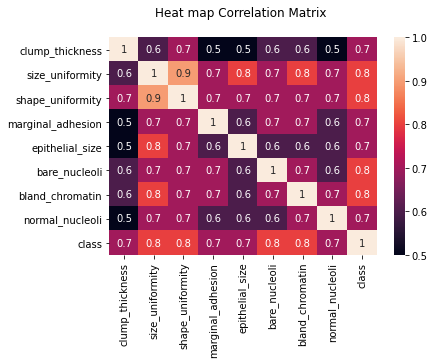

In [23]:
#Creating correlation matrix
matrix = data.corr().round(1)

# Correlation heat map for correlation matrix
sns.heatmap(matrix, annot=True)
plt.title("Heat map Correlation Matrix \n")
plt.show()

### Box Plots of Variables

Box plots were created for each feature to compare the distribution of values between benign and malignant cases. These plots highlight any significant differences in feature values across the classes.

<Figure size 2160x2160 with 0 Axes>

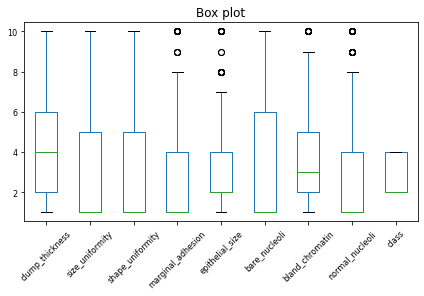

In [24]:
#Drop class (since it's string)
boxplot_data = data.drop(['class'], axis=1)
# Box plot - outliners 
plt.figure(figsize=(30,30))
data.plot.box(grid=False, rot=45, fontsize=8)
plt.tight_layout()
plt.title("Box plot")
plt.show()

### Class Balance

We also examined the balance of classes in our dataset. This is crucial because an imbalanced dataset can lead to biased model predictions. Our data showed the following class distribution:

- Class 2: Benign
- Class 4: Malignant

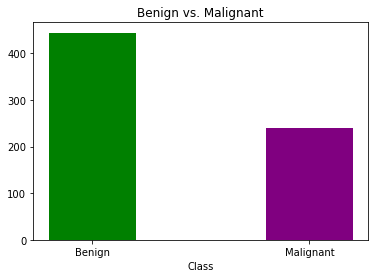

In [25]:
# ploting class ---
x_values = data['class'].unique()
y_values = data['class'].value_counts().tolist()

# x axis new names - plot 
x_names = ['Benign', 'Malignant']

# plot
ax = plt.subplot()
plt.bar(x_values,y_values, color = ['green', 'purple'])
plt.title('Benign vs. Malignant')
ax.set_xlabel("Class")
plt.xticks(x_values, x_names)
plt.show()

## Baseline Model: Logistic Regression

To establish a baseline for comparison, we first implemented a logistic regression model. Logistic regression is a simple yet effective model for binary classification tasks.

Agregar algo perrón de qué es la logistic regression

### Split into train and test 
We decided to use 25% of the dataset for test and the rest for training the model

In [26]:
df_x = data[['clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli']] 

df_y = data["class"]

Xtrain, Xtest, ytrain, ytest = train_test_split(df_x.values, df_y.values,random_state=1)

### Model Training

The logistic regression model was trained on the processed dataset.

In [27]:
model = LogisticRegression(fit_intercept = True)
model.fit(Xtrain,ytrain)
pred_y = model.predict(Xtest)
acc = accuracy_score(ytest, pred_y)

In [28]:
print("accuracy of the model: "+ str(acc))
print("score of the cross validation: " + str(cross_val_score(model,df_x,df_y, cv=10).mean()))
print("Matrix of confusion: \n" + str(confusion_matrix(ytest, pred_y)))
print(recall_score(ytest, pred_y, average='macro'))
print(precision_score(ytest, pred_y, average='macro'))

accuracy of the model: 0.9824561403508771
score of the cross validation: 0.9664322250639387
Matrix of confusion: 
[[111   0]
 [  3  57]]
0.975
0.986842105263158


### Model Evaluation

The performance of the logistic regression model was evaluated using the following metrics:

- **Accuracy (ACC)**: Measures the proportion of correctly classified instances.
- **Precision**: The ratio of true positive predictions to the total predicted positives.
- **Recall**: The ratio of true positive predictions to the total actual positives.
- **Confusion Matrix**: Provides a summary of the prediction results on the classification problem.

| Metric           | Value  |
|------------------|--------|
| Accuracy         | 0.98   |
| Precision        | 0.98   |
| Recall           | 0.97   |
| Confusion Matrix | [[111, 0], [3, 57]] |

## Improved Model: XGBoost

Building on the baseline model, we implemented an XGBoost classifier. XGBoost is a powerful ensemble learning algorithm known for its high performance and accuracy in classification tasks.


### Model Training

The XGBoost model was trained using the same training and testing split. XGBoost's ability to handle missing values and its regularization capabilities make it a robust choice for our prediction task.

In [34]:
clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=4, random_state=0).fit(Xtrain, ytrain)
pred_y = clf.predict(Xtest)
print("The accuracy with Gradient boost  is", accuracy_score(ytest, pred_y))
print("score of the cross validation: ", cross_val_score(clf,df_x,df_y, cv=10).mean())
print("Matrix of confusion: \n" + str(confusion_matrix(ytest, pred_y)))
print(recall_score(ytest, pred_y, average='macro'))
print(precision_score(ytest, pred_y, average='macro'))

The accuracy with Gradient boost  is 0.9941520467836257
score of the cross validation:  0.966389599317988
Matrix of confusion: 
[[111   0]
 [  1  59]]
0.9916666666666667
0.9955357142857143


### Model Evaluation

The XGBoost model's performance was evaluated using the same set of metrics:

- **Accuracy (ACC)**: Measures the proportion of correctly classified instances.
- **Precision**: The ratio of true positive predictions to the total predicted positives.
- **Recall**: The ratio of true positive predictions to the total actual positives.
- **False Positive Rate (FPR)**: The ratio of false positives to the total actual negatives.
- **Confusion Matrix**: Provides a summary of the prediction results on the classification problem.

| Metric           | Value  |
|------------------|--------|
| Accuracy         | 0.99   |
| Precision        | 0.99   |
| Recall           | 0.99   |
| Confusion Matrix | [[111, 0], [1, 59]] |